# Importar librerías necesarias

In [1]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Analisis dataset homicidios

## <u>Carga del archivo<u>

Puesto que los archivos de excel contienen valores que han sido calculados mediante formulas, se procede a guardar las hojas necesarias en formato csv. <br>
Para poder analizar la información los datos se guarda dataframes correspondientes.

In [2]:
# Carga de cada archivo
df_hechos = pd.read_csv("datasets/hechos.csv")
df_victimas = pd.read_csv("datasets/victimas.csv")

Eliminando filas de datos vacios

In [3]:
# Dataframe de "hechos"
df_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10493 entries, 0 to 10492
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     696 non-null    object 
 1   N_VICTIMAS             696 non-null    float64
 2   FECHA                  696 non-null    object 
 3   AAAA                   696 non-null    float64
 4   MM                     696 non-null    float64
 5   DD                     696 non-null    float64
 6   HORA                   696 non-null    object 
 7   HH                     696 non-null    object 
 8   LUGAR_DEL_HECHO        696 non-null    object 
 9   TIPO_DE_CALLE          696 non-null    object 
 10  Calle                  695 non-null    object 
 11  Altura                 129 non-null    float64
 12  Cruce                  525 non-null    object 
 13  Dirección Normalizada  688 non-null    object 
 14  COMUNA                 696 non-null    float64
 15  XY

In [4]:
# Eliminar filas donde todas las columnas tienen datos vacíos
df_hechos = df_hechos.dropna(how='all')
df_hechos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     696 non-null    object 
 1   N_VICTIMAS             696 non-null    float64
 2   FECHA                  696 non-null    object 
 3   AAAA                   696 non-null    float64
 4   MM                     696 non-null    float64
 5   DD                     696 non-null    float64
 6   HORA                   696 non-null    object 
 7   HH                     696 non-null    object 
 8   LUGAR_DEL_HECHO        696 non-null    object 
 9   TIPO_DE_CALLE          696 non-null    object 
 10  Calle                  695 non-null    object 
 11  Altura                 129 non-null    float64
 12  Cruce                  525 non-null    object 
 13  Dirección Normalizada  688 non-null    object 
 14  COMUNA                 696 non-null    float64
 15  XY (CABA)  

In [5]:
# Dataframe de "victimas"
df_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID_hecho             717 non-null    object 
 1   FECHA                717 non-null    object 
 2   AAAA                 717 non-null    float64
 3   MM                   717 non-null    float64
 4   DD                   717 non-null    float64
 5   ROL                  717 non-null    object 
 6   VICTIMA              717 non-null    object 
 7   SEXO                 717 non-null    object 
 8   EDAD                 717 non-null    object 
 9   FECHA_FALLECIMIENTO  717 non-null    object 
dtypes: float64(3), object(7)
memory usage: 56.4+ KB


In [6]:
# Eliminar filas donde todas las columnas tienen datos vacíos
df_victimas = df_victimas.dropna(how='all')
df_victimas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID_hecho             717 non-null    object 
 1   FECHA                717 non-null    object 
 2   AAAA                 717 non-null    float64
 3   MM                   717 non-null    float64
 4   DD                   717 non-null    float64
 5   ROL                  717 non-null    object 
 6   VICTIMA              717 non-null    object 
 7   SEXO                 717 non-null    object 
 8   EDAD                 717 non-null    object 
 9   FECHA_FALLECIMIENTO  717 non-null    object 
dtypes: float64(3), object(7)
memory usage: 61.6+ KB


Buscando duplicados en todas las columnas

In [7]:
# Para el dataframe "hechos"
df_hechos.duplicated().sum()

0

In [8]:
# Para el dataframe "victimas"
df_victimas.duplicated().sum()

0

## <u>EDA de hechos<u>

### *Resumen estadístico de la cantidad de victimas*

In [9]:
df_hechos["N_VICTIMAS"].describe()

count    696.000000
mean       1.030172
std        0.179393
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: N_VICTIMAS, dtype: float64

Debido a que existe una baja variabilidad en el número de víctimas, y que más del 75% de simiestros muestran que el promedio de victimas es uno, se procede a graficar la distribución del número de victimas por siniestro.

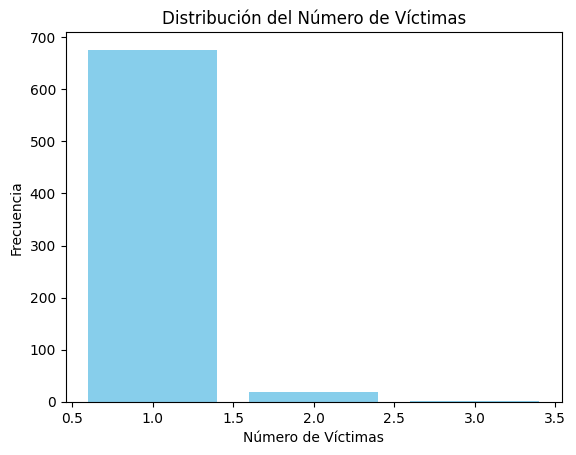

In [10]:
conteo_victimas = df_hechos['N_VICTIMAS'].value_counts().sort_index()

# Preparar los datos para el gráfico de barras
valores = conteo_victimas.index
frecuencias = conteo_victimas.values

# Crear el gráfico de barras
plt.bar(valores, frecuencias, color='skyblue')

# Añadir títulos y etiquetas
plt.title('Distribución del Número de Víctimas')
plt.xlabel('Número de Víctimas')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [11]:
# Cantidad de de victimas por siniestro
conteo_victimas

N_VICTIMAS
1.0    676
2.0     19
3.0      1
Name: count, dtype: int64

    - La mayoría de los siniestros viales involucran a una sola víctima. Esto indica que la gran mayoría de los incidentes tienen un impacto limitado en términos de víctimas.
    - Un número mucho más pequeño de siniestros viales (3% aproximadamente) involucra a dos víctimas. Aunque menos comunes que los incidentes con una sola víctima, estos casos aún representan una proporción significativa.
    - En raras ocasiones, un siniestro vial resulta en tres víctimas. Estos casos son poco frecuentes pero merecen una atención especial debido a su mayor gravedad y complejidad.
    Estos hallazgos pueden ser útiles para comprender la gravedad y la complejidad de los incidents, los cuales pueden ser complementados con los análisis posteriores. 


### *Análisis temporal de número de victimas*

Se realiza un análisis temporal ya que nos permite observar tendencias y patrones a lo largo del tiempo en relación con los siniestros viales y la cantidad de víctimas involucradas.

In [12]:
# Convertir las columnas 'AÑO' y 'MES' a tipo entero
df_hechos['AAAA'] = df_hechos['AAAA'].astype(int)
df_hechos['MM'] = df_hechos['MM'].astype(int)

In [13]:
# Agrupar por año y mes, y sumar el número de víctimas
analisis_temporal = df_hechos.groupby(['AAAA', 'MM'])['N_VICTIMAS'].sum().reset_index()

In [14]:
# Combinar AÑO y MES para obtener una sola variable de tiempo
analisis_temporal['FECHA'] = analisis_temporal['AAAA'].astype(str) + '-' + analisis_temporal['MM'].astype(str)

# Convertir la variable de tiempo a formato datetime
analisis_temporal['FECHA'] = pd.to_datetime(analisis_temporal['FECHA'])

# Ordenar el DataFrame por fecha
analisis_temporal = analisis_temporal.sort_values('FECHA')

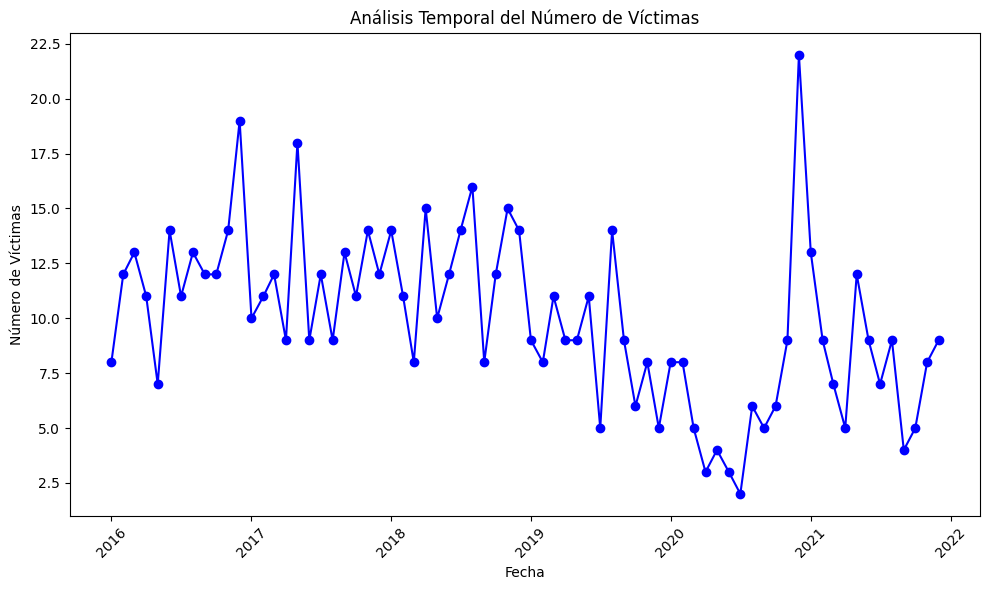

In [15]:
# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(analisis_temporal['FECHA'], analisis_temporal['N_VICTIMAS'], marker='o', color='b')

# Añadir títulos y etiquetas
plt.title('Análisis Temporal del Número de Víctimas')
plt.xlabel('Fecha')
plt.ylabel('Número de Víctimas')

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

    Si bien existe mucha variación de la cantidad de victimas en los meses de cada año, hay patrones importantes que nos muestra el gráfico:
    - A inicios y finales de año existe un aumento en la cantidad de victimas.
    - En el período de 2018 al 2020 hay una tendencia bajista, es decir, hay una disminución en la cantidad de victimas. 
    - La gran disminución en el año 2020 es debido a la pandemia, sin embargo, este período ayuda a corroborar lo mencionado en el primer punto.


### *Distribución de número de victimas*

#### Por Año

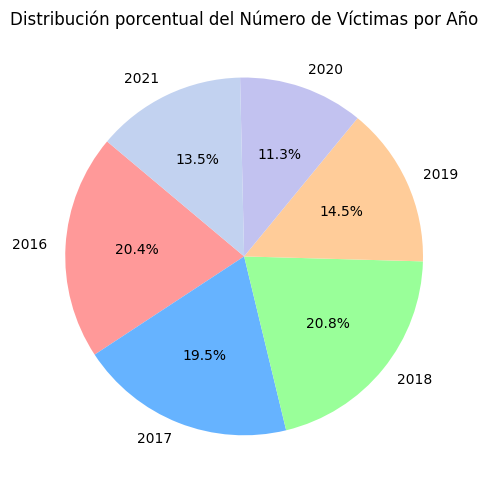

In [22]:
# Distribución porcentual del número de víctimas por año
# Calcular el total de víctimas por año
total_victimas_por_año = df_hechos.groupby('AAAA')['N_VICTIMAS'].sum()

# Crear el gráfico tipo torta
plt.figure(figsize=(5, 5))
plt.pie(total_victimas_por_año, labels=total_victimas_por_año.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0', '#c2d2f0'])

# Añadir título
plt.title('Distribución porcentual del Número de Víctimas por Año')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

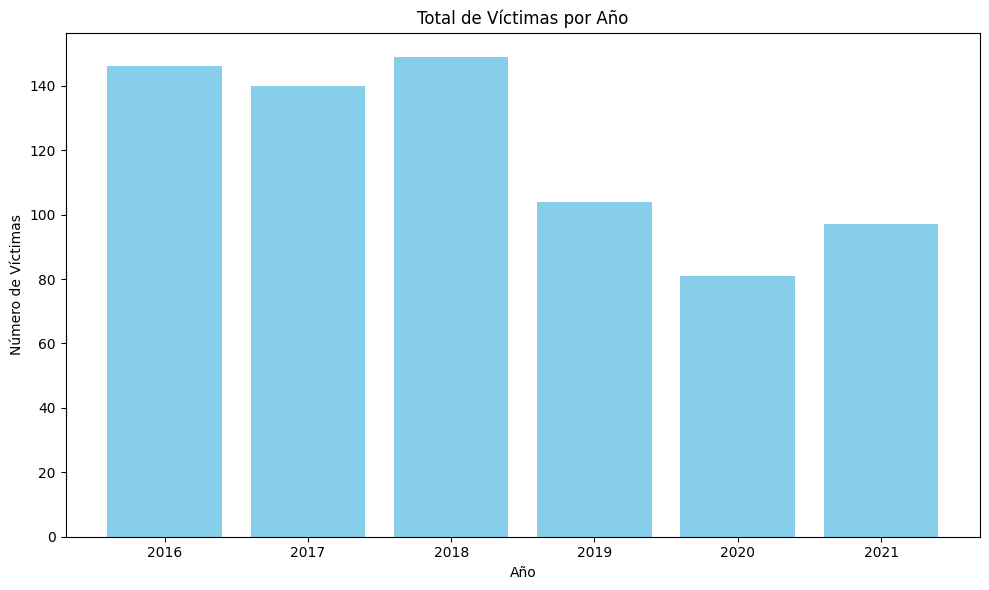

In [19]:
# Calcular el total de víctimas por año
total_victimas_por_año = df_hechos.groupby('AAAA')['N_VICTIMAS'].sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(total_victimas_por_año.index, total_victimas_por_año.values, color='skyblue')

# Añadir títulos y etiquetas
plt.title('Total de Víctimas por Año')
plt.xlabel('Año')
plt.ylabel('Número de Víctimas')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

    Este gráfico es un complemento al análisis temporal, ya que nos permite corroborar que durante el período de 2018 al 2020 hay una tendencia bajista, es decir, hay una disminución en la cantidad de victimas. 

#### Por Mes

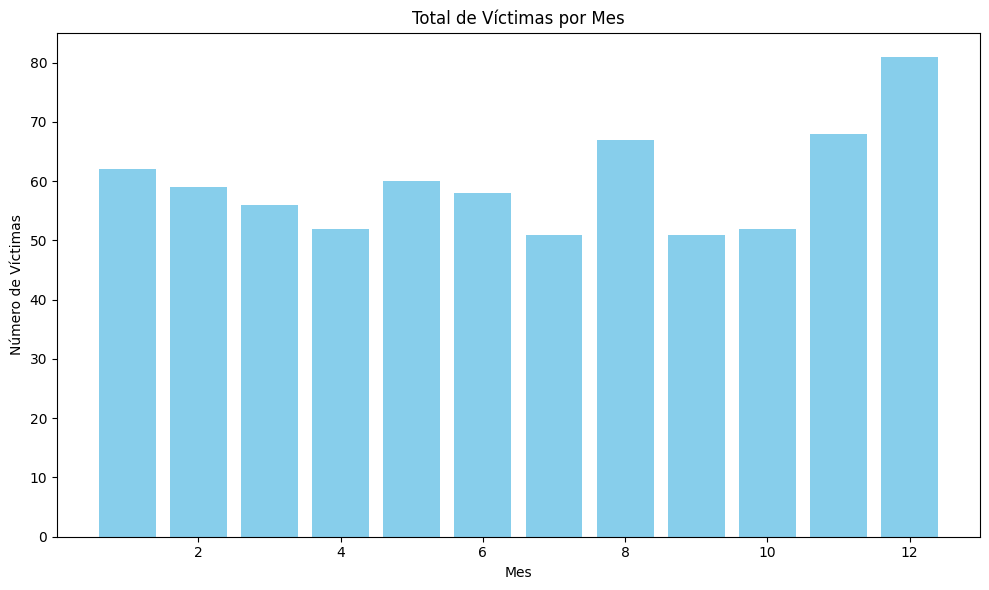

In [23]:
# Calcular el total de víctimas por mes
total_victimas_por_mes = df_hechos.groupby('MM')['N_VICTIMAS'].sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(total_victimas_por_mes.index, total_victimas_por_mes.values, color='skyblue')

# Añadir títulos y etiquetas
plt.title('Total de Víctimas por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Víctimas')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

    Este gráfico es un complemento al análisis temporal, ya que nos permite corroborar que a inicios y finales de cada año existe un aumento en el número de victimas.

#### Por Día del mes

In [59]:
# Calcular el total de víctimas por día
total_victimas_por_dia = df_hechos.groupby('DD')['N_VICTIMAS'].sum()

In [60]:
total_victimas_por_dia.describe()

count    31.000000
mean     23.129032
std       4.529473
min      13.000000
25%      20.000000
50%      24.000000
75%      26.000000
max      32.000000
Name: N_VICTIMAS, dtype: float64

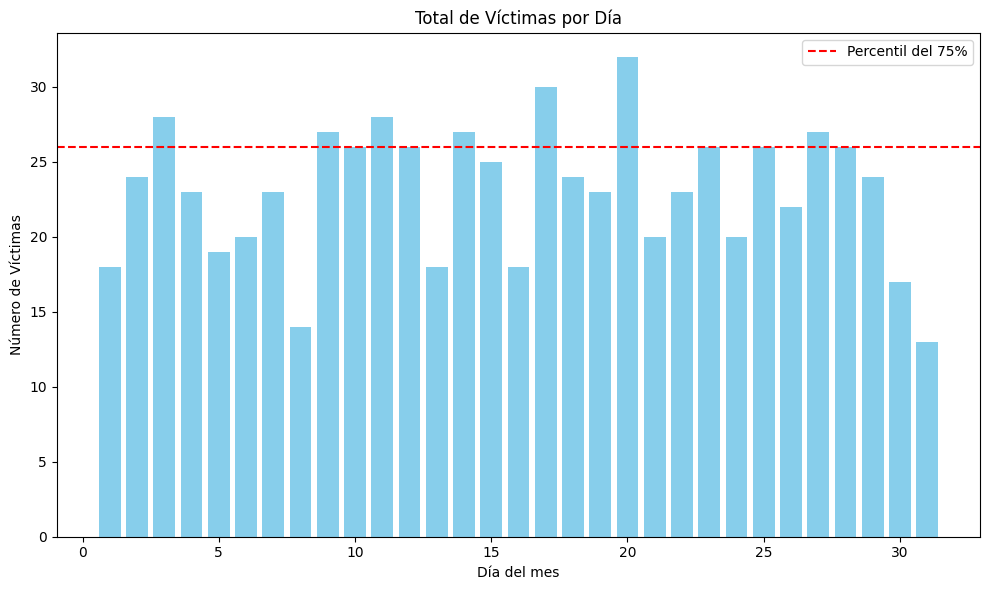

In [64]:
# Calcular la mediana del 75%
percentil_75 = total_victimas_por_dia.quantile(0.75)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(total_victimas_por_dia.index, total_victimas_por_dia.values, color='skyblue')

# Añadir la línea horizontal para la mediana del 75%
plt.axhline(y=percentil_75, color='red', linestyle='--', label='Percentil del 75%')

# Añadir títulos y etiquetas
plt.title('Total de Víctimas por Día')
plt.xlabel('Día del mes')
plt.ylabel('Número de Víctimas')

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

#### Por Día de la semana

In [29]:
# Convertir la columna 'FECHA' a tipo datetime si aún no lo está
df_hechos['FECHA'] = pd.to_datetime(df_hechos['FECHA'])

# Obtener el día de la semana (0=Monday, 1=Tuesday, ..., 6=Sunday)
df_hechos['DIA_SEMANA'] = df_hechos['FECHA'].dt.dayofweek

# Calcular el total de víctimas por día de la semana
total_victimas_por_dia = df_hechos.groupby('DIA_SEMANA')['N_VICTIMAS'].sum()

# Definir nombres de los días de la semana
nombres_dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']


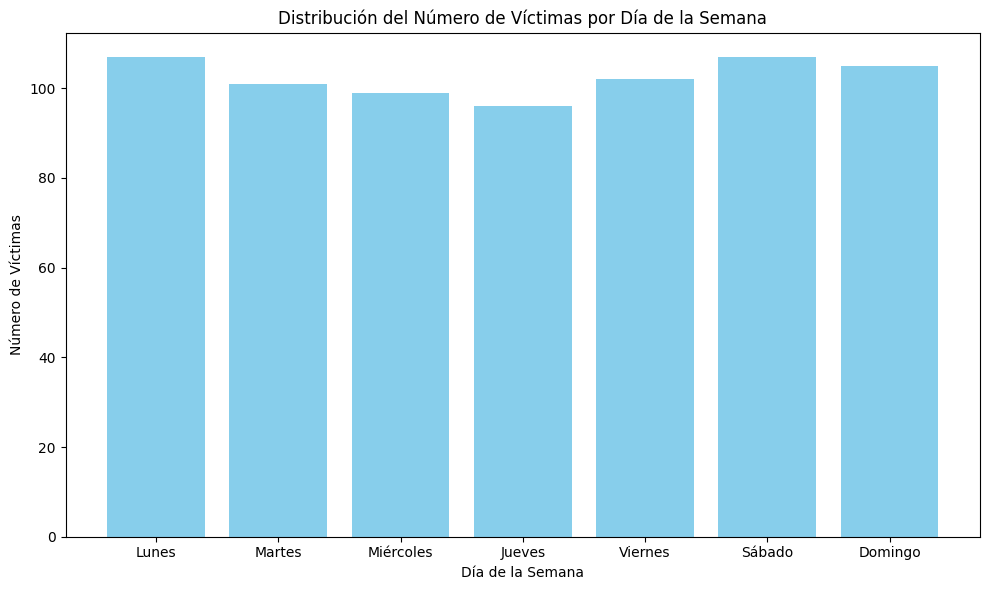

In [30]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(nombres_dias_semana, total_victimas_por_dia, color='skyblue')

# Añadir títulos y etiquetas
plt.title('Distribución del Número de Víctimas por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Víctimas')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

#### Por Hora

In [52]:
# Reemplazar "SD" con NaN
df_hechos['HH'] = df_hechos['HH'].replace('SD', pd.NA)

# Convertir la Hora a tipo numérico
df_hechos['HH'] = pd.to_numeric(df_hechos['HH'], errors='coerce')

# Calcular el total de víctimas por Hora
total_victimas_por_hora = df_hechos.groupby('HH')['N_VICTIMAS'].sum()

In [53]:
total_victimas_por_hora.describe()

count    24.000000
mean     29.833333
std       6.349712
min      17.000000
25%      26.000000
50%      30.000000
75%      32.250000
max      43.000000
Name: N_VICTIMAS, dtype: float64

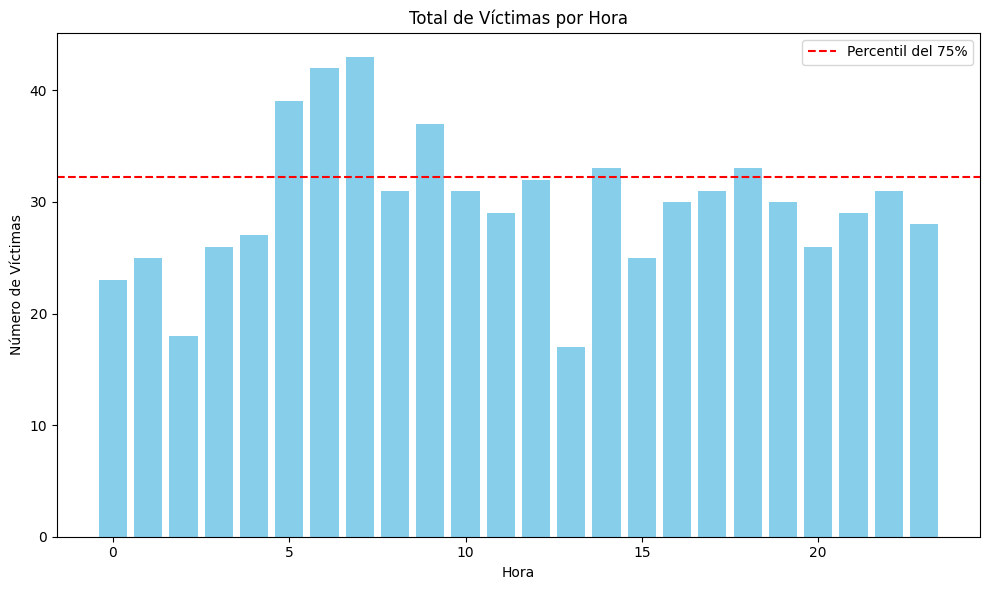

In [58]:

# Calcular la mediana del 75%
percentil_75 = total_victimas_por_hora.quantile(0.75)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(total_victimas_por_hora.index, total_victimas_por_hora.values, color='skyblue')

# Añadir la línea horizontal para la mediana del 75%
plt.axhline(y=percentil_75, color='red', linestyle='--', label='Percentil del 75%')

# Añadir títulos y etiquetas
plt.title('Total de Víctimas por Hora')
plt.xlabel('Hora')
plt.ylabel('Número de Víctimas')

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

#### Por Lugar (Comuna)

In [62]:
# Calcular el total de víctimas por Hora
total_victimas_por_comuna = df_hechos.groupby('COMUNA')['N_VICTIMAS'].sum()

In [63]:
total_victimas_por_comuna.describe()

count    16.000000
mean     44.812500
std      24.405515
min       2.000000
25%      28.750000
50%      39.500000
75%      63.250000
max      93.000000
Name: N_VICTIMAS, dtype: float64

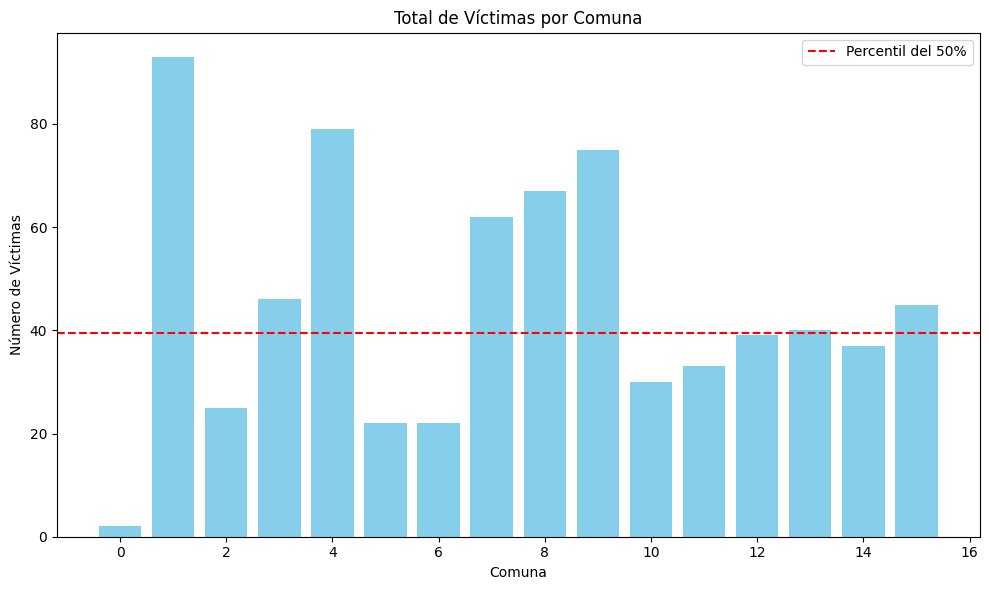

In [67]:
percentil_50 = total_victimas_por_comuna.quantile(0.5)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(total_victimas_por_comuna.index, total_victimas_por_comuna.values, color='skyblue')

# Añadir la línea horizontal para la mediana del 75%
plt.axhline(y=percentil_50, color='red', linestyle='--', label='Percentil del 50%')

# Añadir títulos y etiquetas
plt.title('Total de Víctimas por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Número de Víctimas')

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()